In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesOther', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1813.872, BIC=1843.258, Fit time=2.665 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1950.433, BIC=1976.146, Fit time=1.123 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1821.867, BIC=1847.580, Fit time=2.031 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1814.602, BIC=1847.662, Fit time=3.209 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1977.102, BIC=2002.815, Fit time=0.859 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1816.702, BIC=1853.435, Fit time=7.659 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1807.921, BIC=1840.981, Fit time=3.151 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error (RMSE): 10.89505389313358  Num NaN: 0'

'Test Error (RMSE): 14.988908573288349    Num NaN: 0'

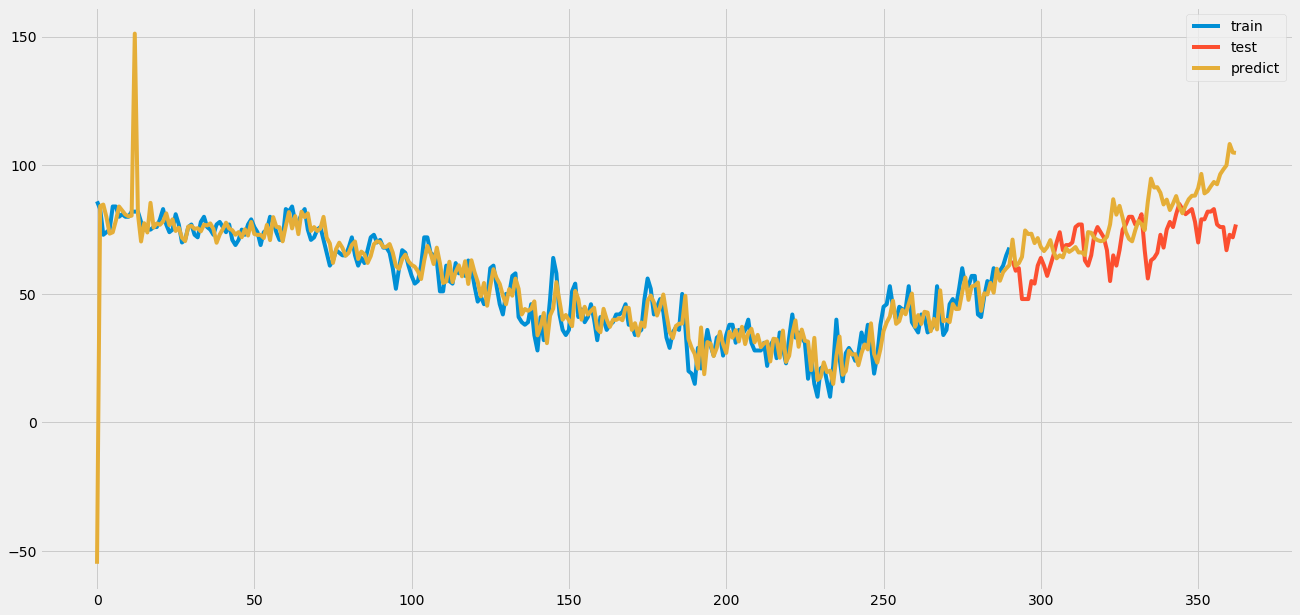

In [4]:
model = ARIMA(analysis=analysis, use_features=True)
analysis.run_model(model, name='ARIMA')

'Train Error (RMSE): 5.297992876772936  Num NaN: 0'

'Test Error (RMSE): 5.510948698323689    Num NaN: 0'

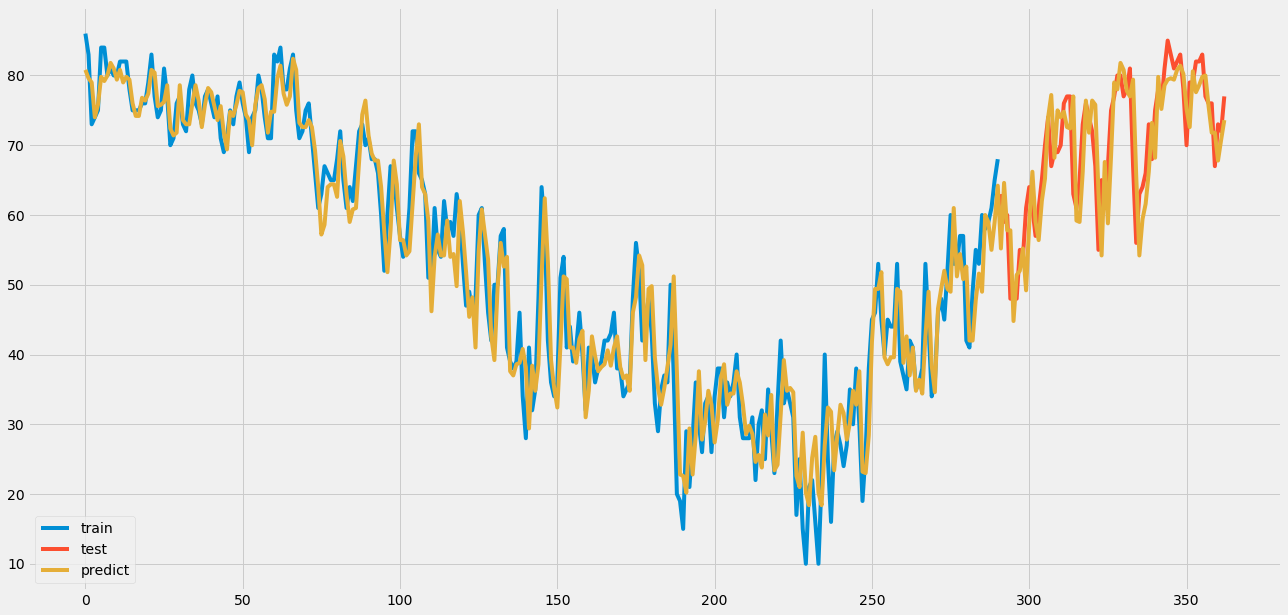

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis=analysis, regressor=KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error (RMSE): 3199492997724.954  Num NaN: 0'

'Test Error (RMSE): 4049969746355.621    Num NaN: 0'

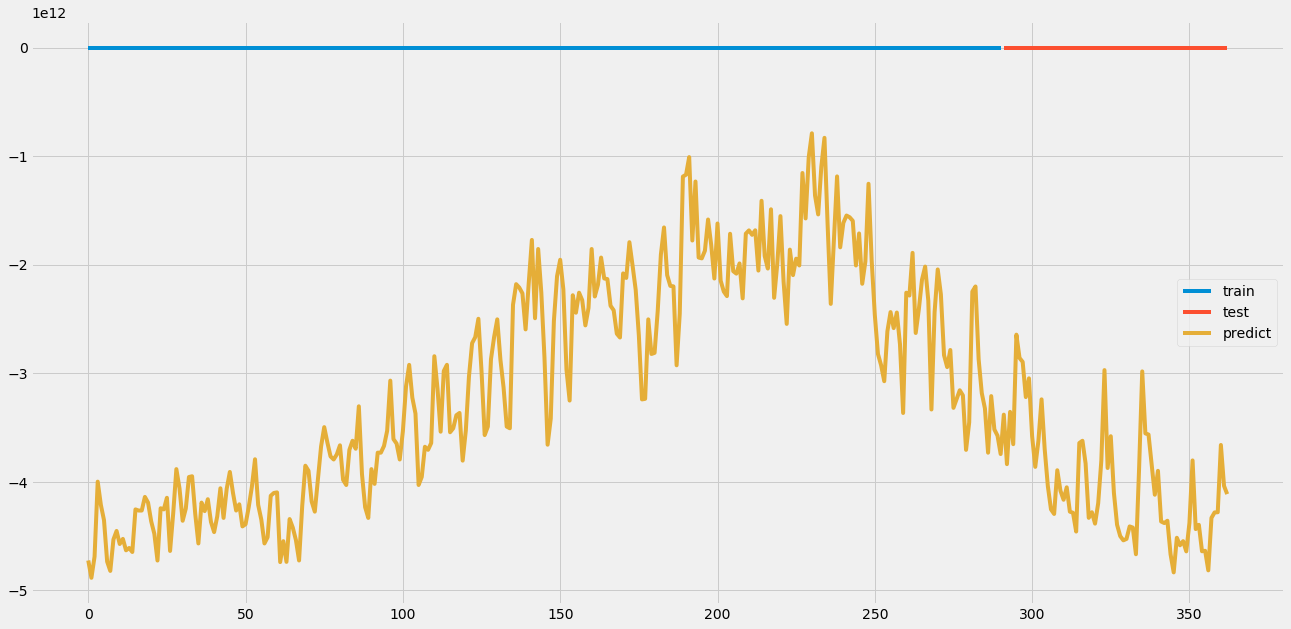

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis=analysis, regressor=SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error (RMSE): 3.0395342774371263  Num NaN: 0'

'Test Error (RMSE): 5.9500691407468045    Num NaN: 0'

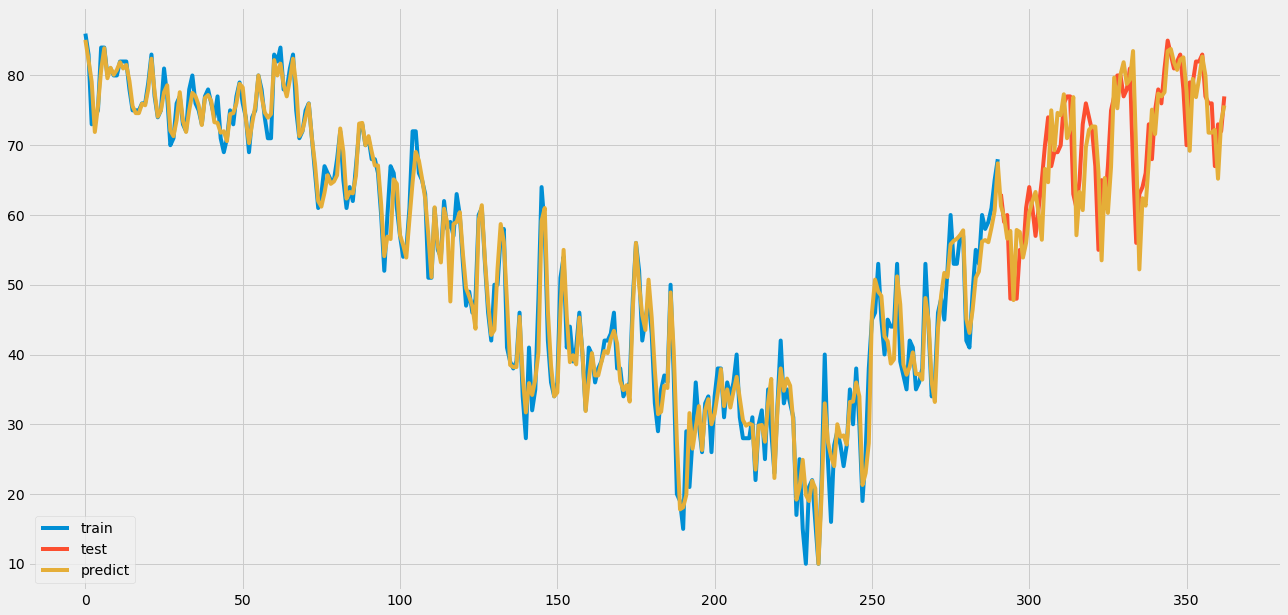

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis=analysis, regressor=RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error (RMSE): 5.694592909149029  Num NaN: 0'

'Test Error (RMSE): 5.664095349914042    Num NaN: 0'

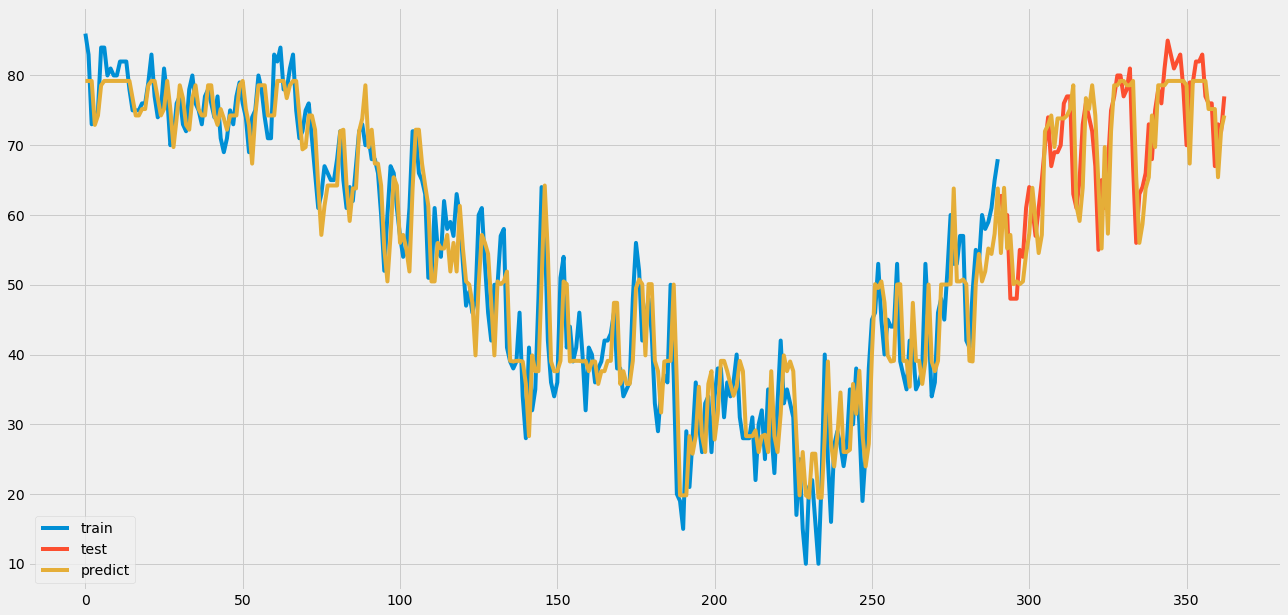

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis=analysis, regressor=AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error (RMSE): 1.2554600447506414  Num NaN: 0'

'Test Error (RMSE): 42.29476972646413    Num NaN: 0'

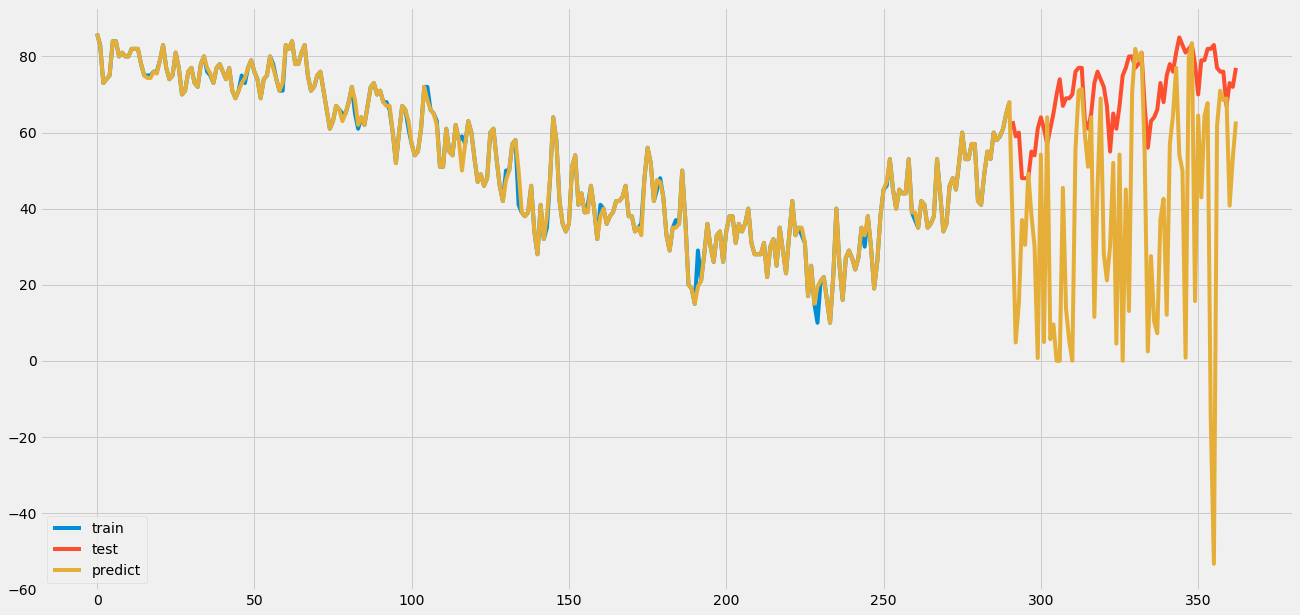

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis=analysis, regressor=GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

Using TensorFlow backend.
D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


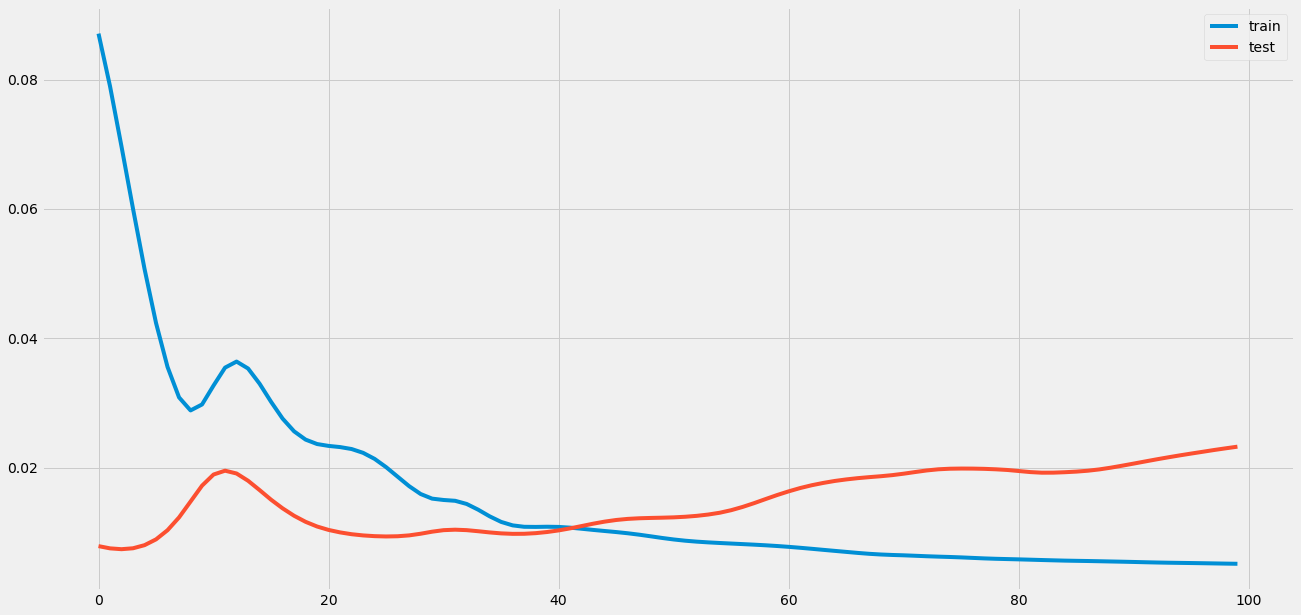

'Train Error (RMSE): 6.13256978501316  Num NaN: 0'

'Test Error (RMSE): 7.2144431510219915    Num NaN: 0'

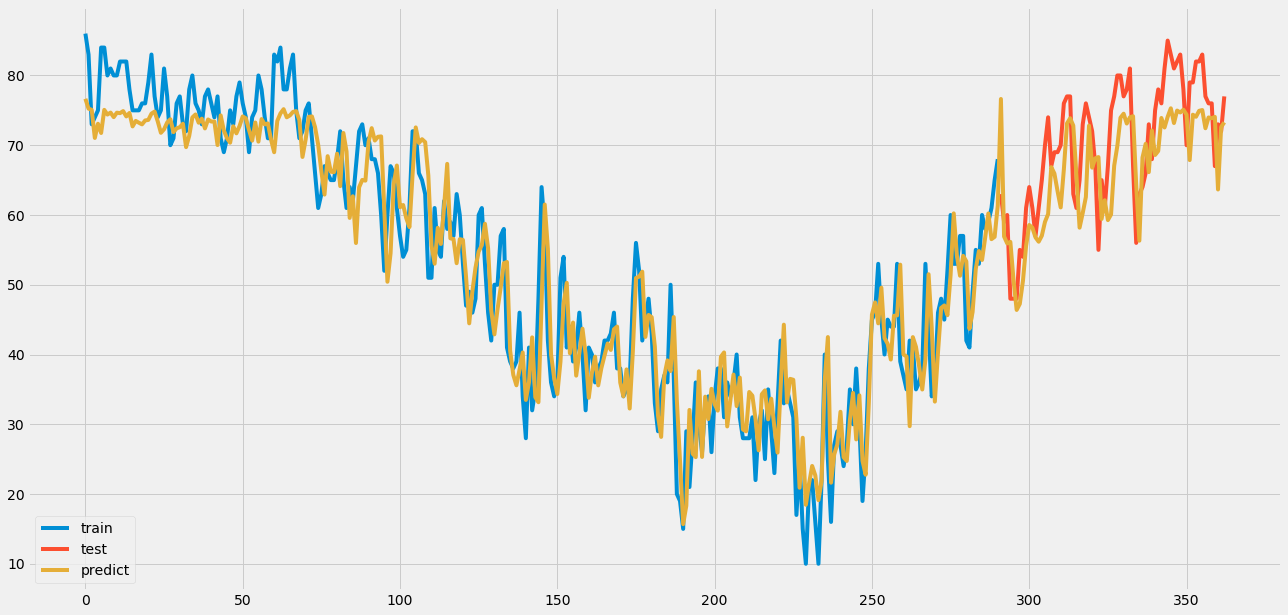

In [10]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='RNNAll')

## Recurrent Neural Network Complete Sequence (LSTM)

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


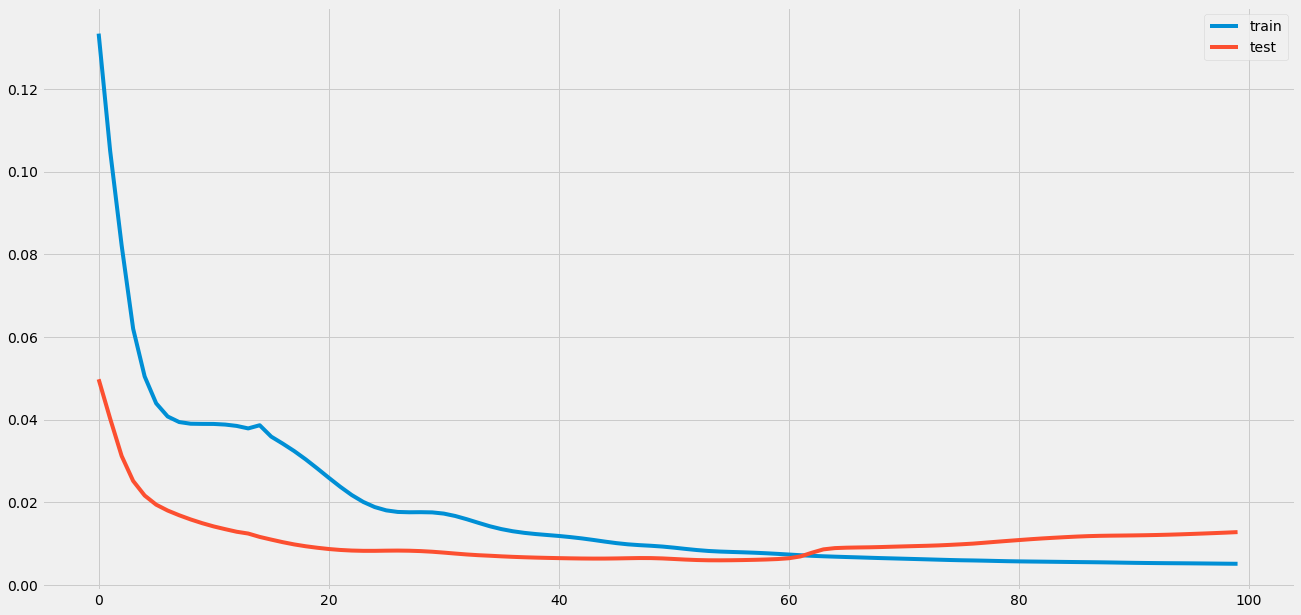

'Train Error (RMSE): 6.145744054938363  Num NaN: 0'

'Test Error (RMSE): 11.401299467254216    Num NaN: 0'

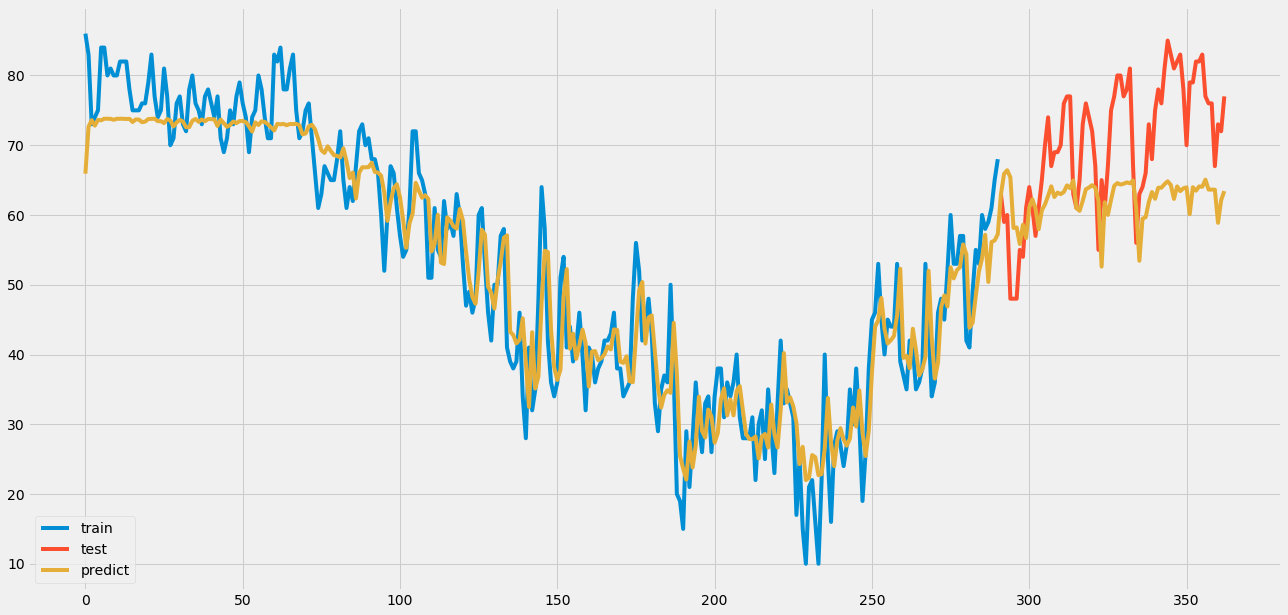

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='LSTMAll')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error (RMSE): 5.524216468169589  Num NaN: 4'

'Test Error (RMSE): 5.572764221426477    Num NaN: 4'

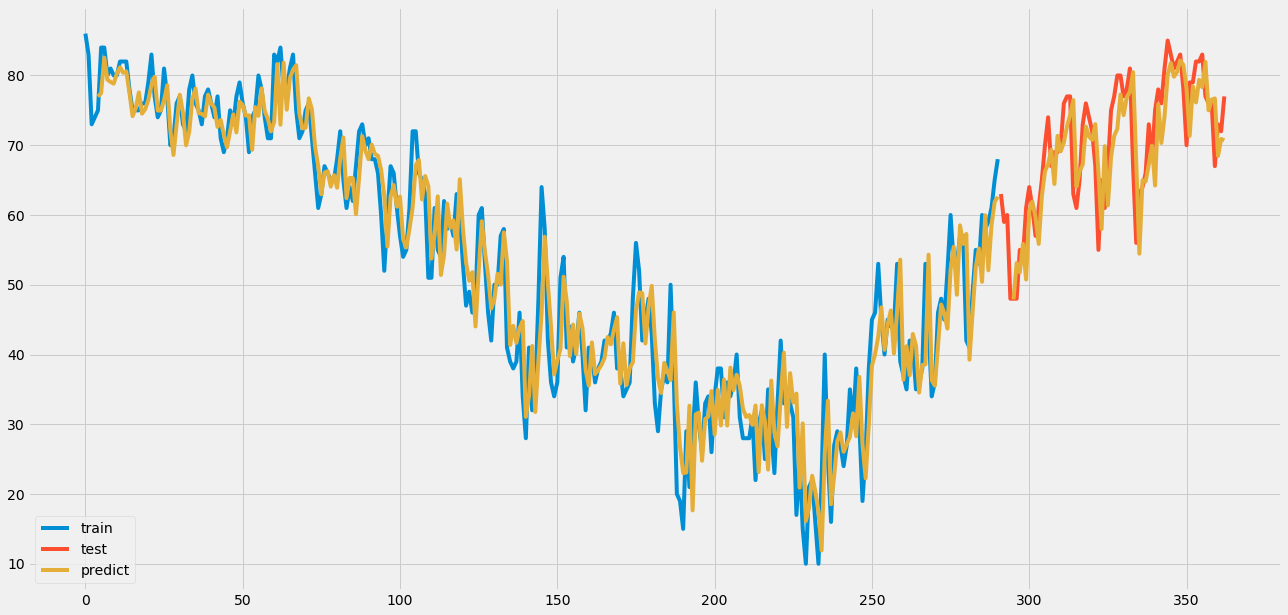

In [12]:
model = LinearRegression(analysis=analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

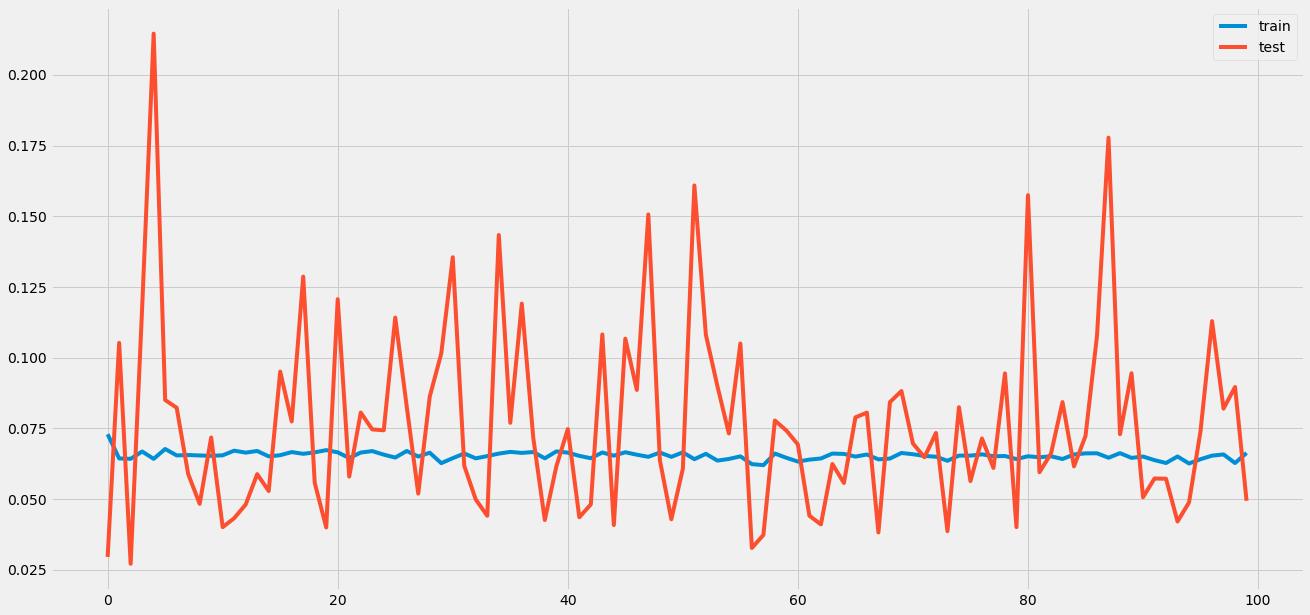

'Train Error (RMSE): 19.2965470120464  Num NaN: 4'

'Test Error (RMSE): 16.669556303318963    Num NaN: 4'

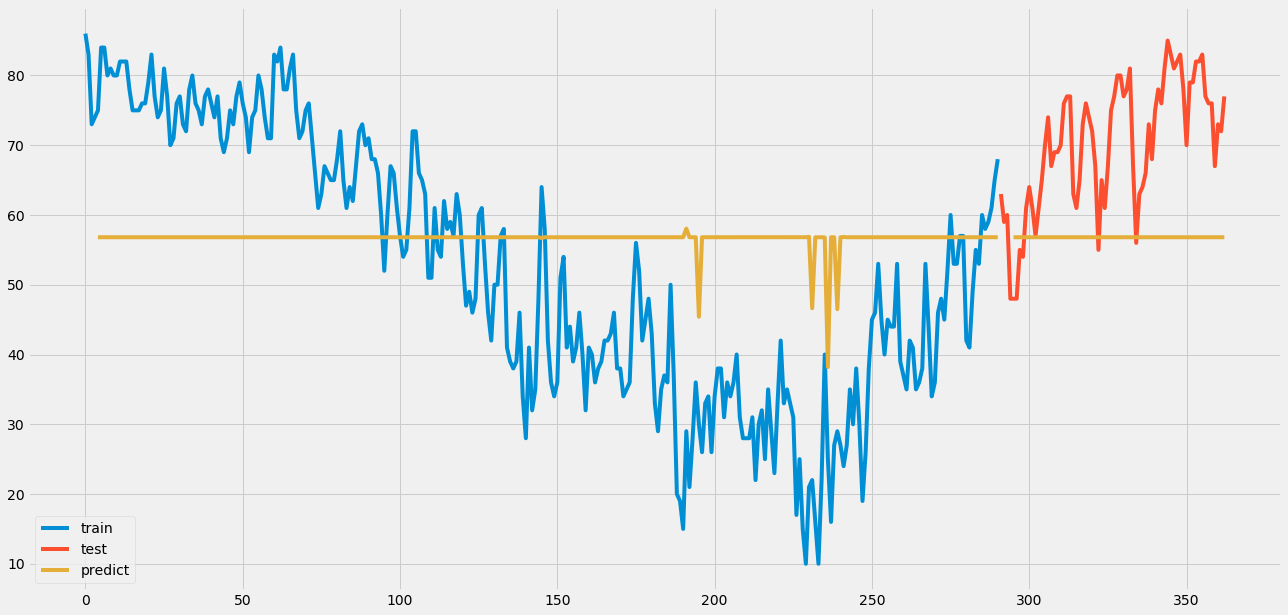

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mse', optimizer='sgd')

model = FNN(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

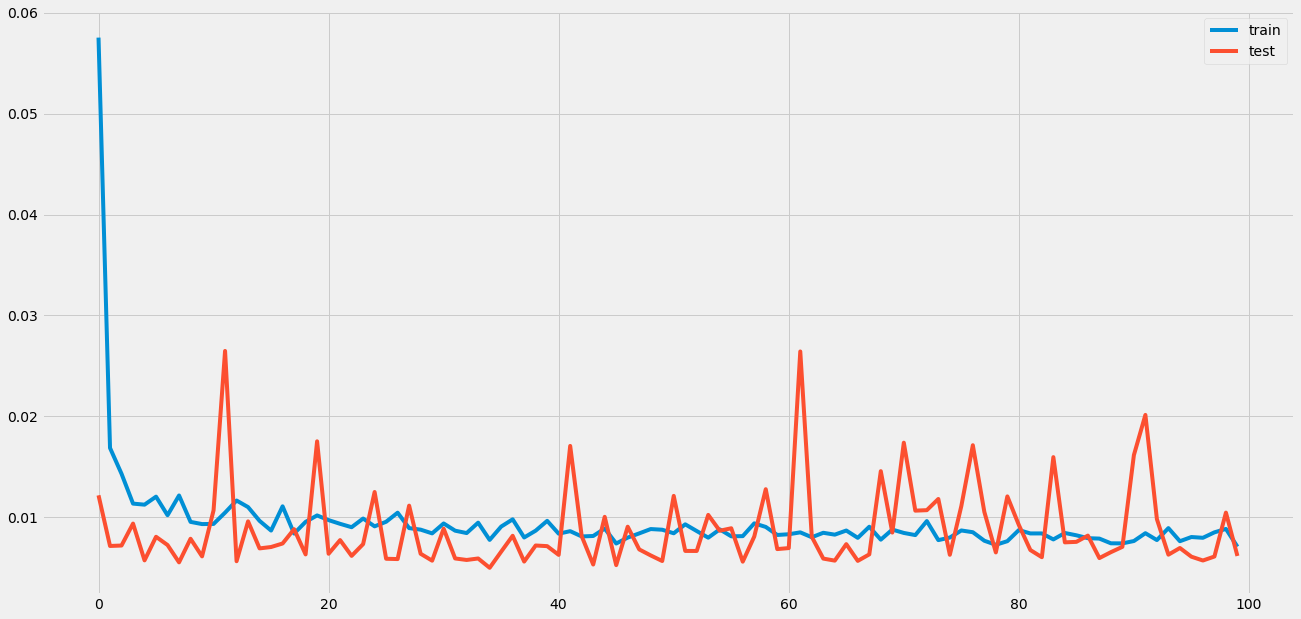

'Train Error (RMSE): 6.3525455902318475  Num NaN: 4'

'Test Error (RMSE): 5.897130844324904    Num NaN: 4'

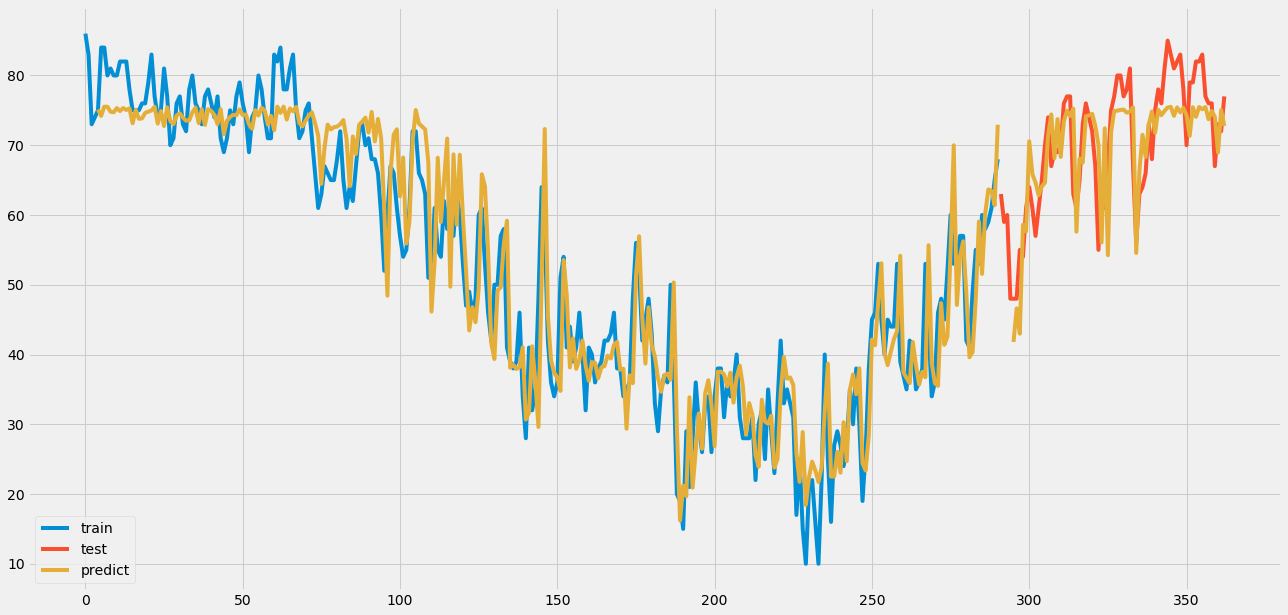

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mse', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

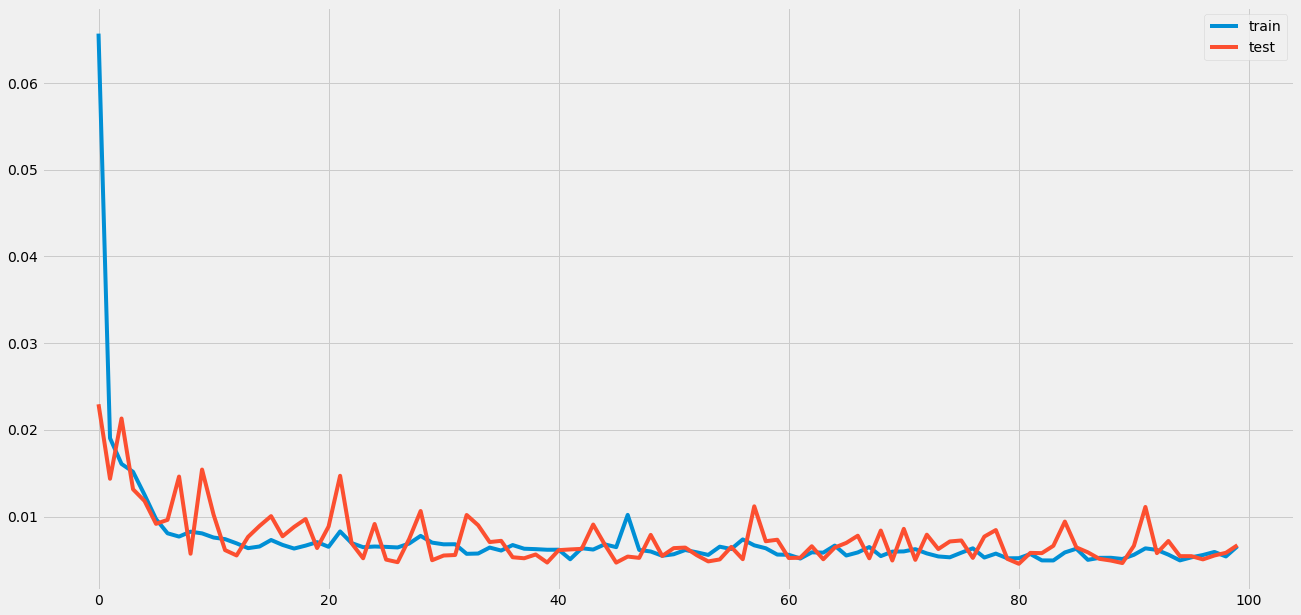

'Train Error (RMSE): 6.097918528517041  Num NaN: 0'

'Test Error (RMSE): 7.183028916434307    Num NaN: 0'

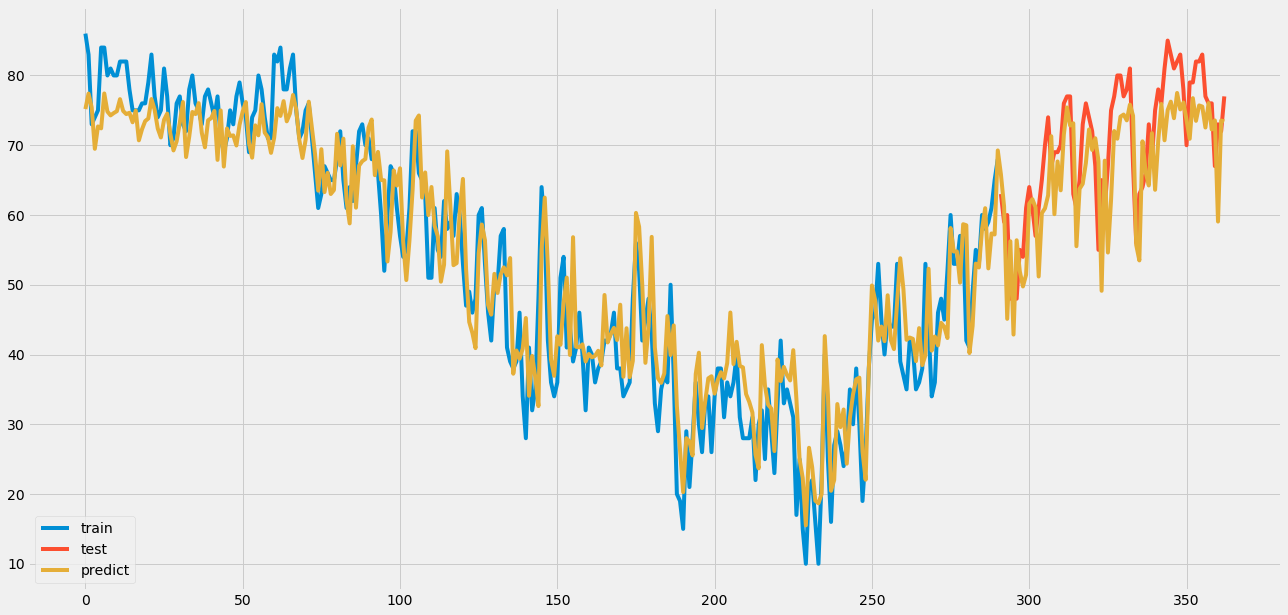

In [15]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network with Single Output (LSTM)

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

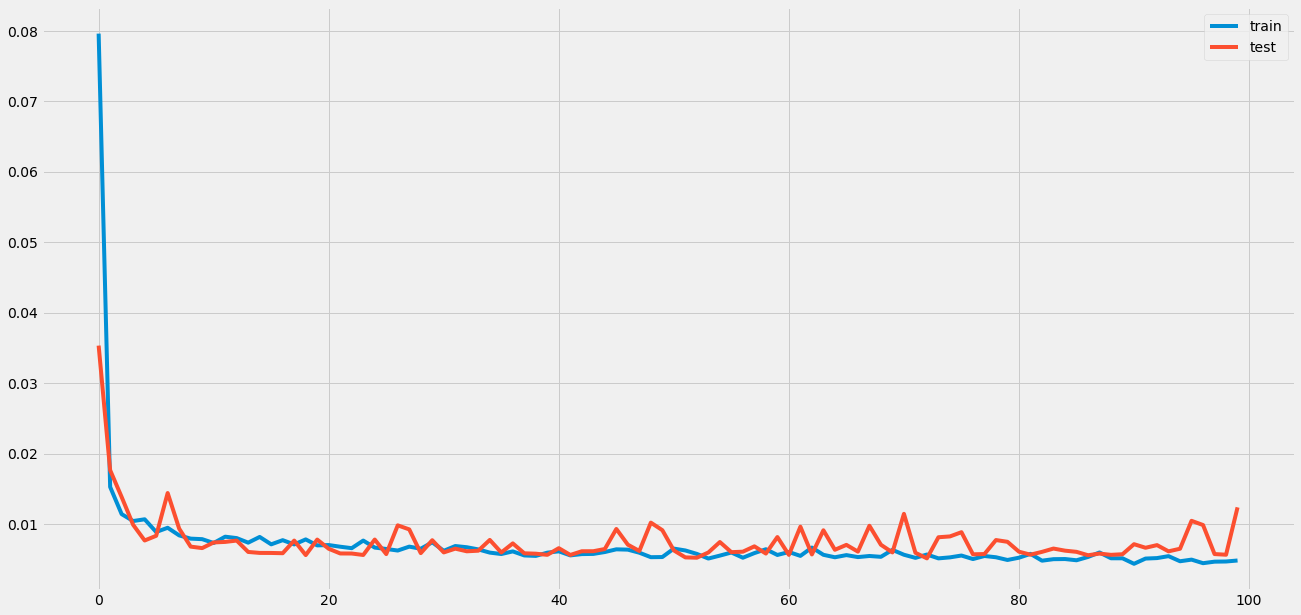

'Train Error (RMSE): 6.915678520464187  Num NaN: 4'

'Test Error (RMSE): 8.337673228462283    Num NaN: 4'

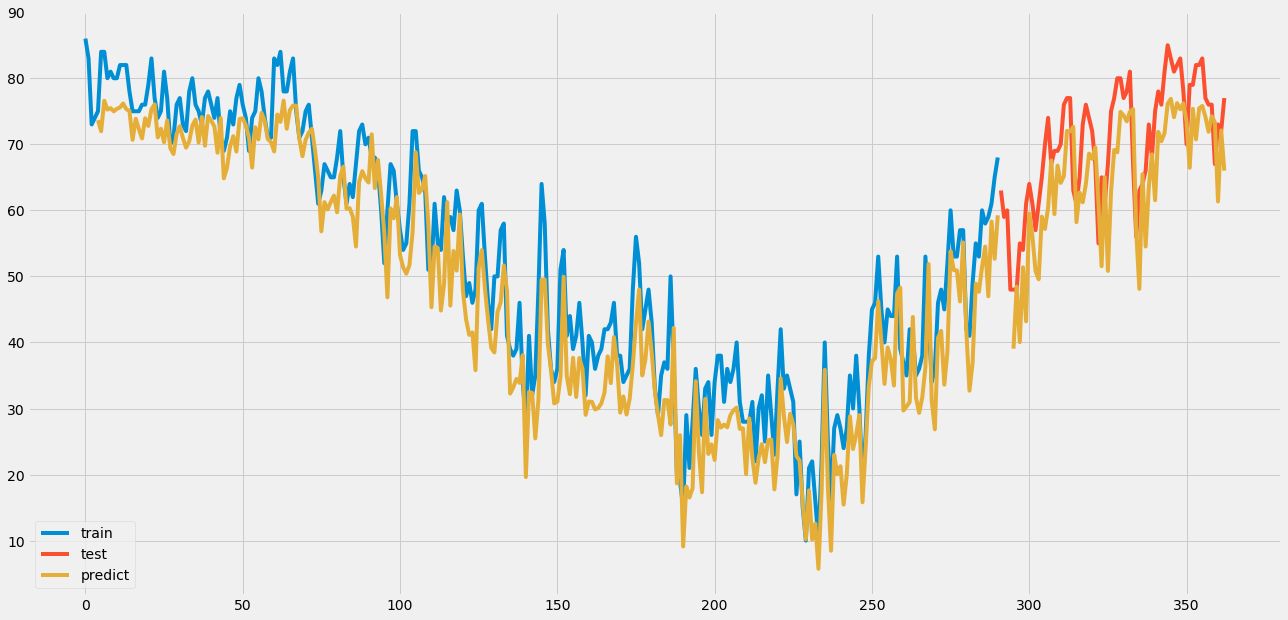

In [16]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mse', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMSingle')

## Recurrent Neural Network with Multiple Outputs (LSTM)

Multiple outputs means that the chunked data is input and the output at each timestep is used.

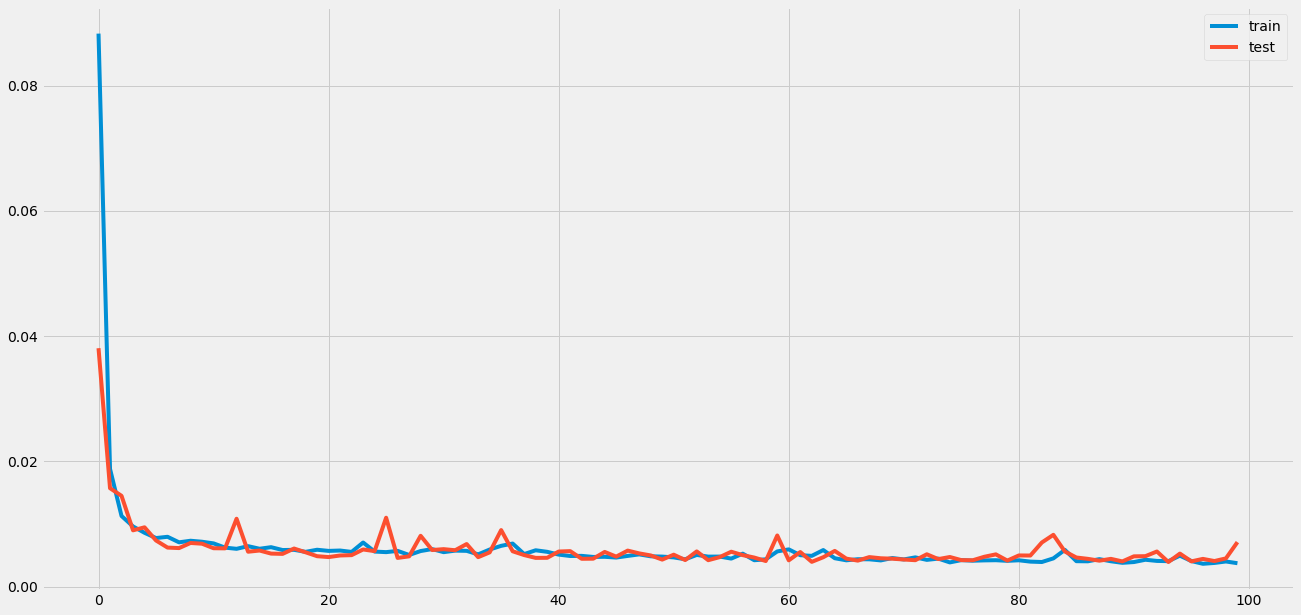

'Train Error (RMSE): 5.741294128832571  Num NaN: 0'

'Test Error (RMSE): 7.368986499363353    Num NaN: 0'

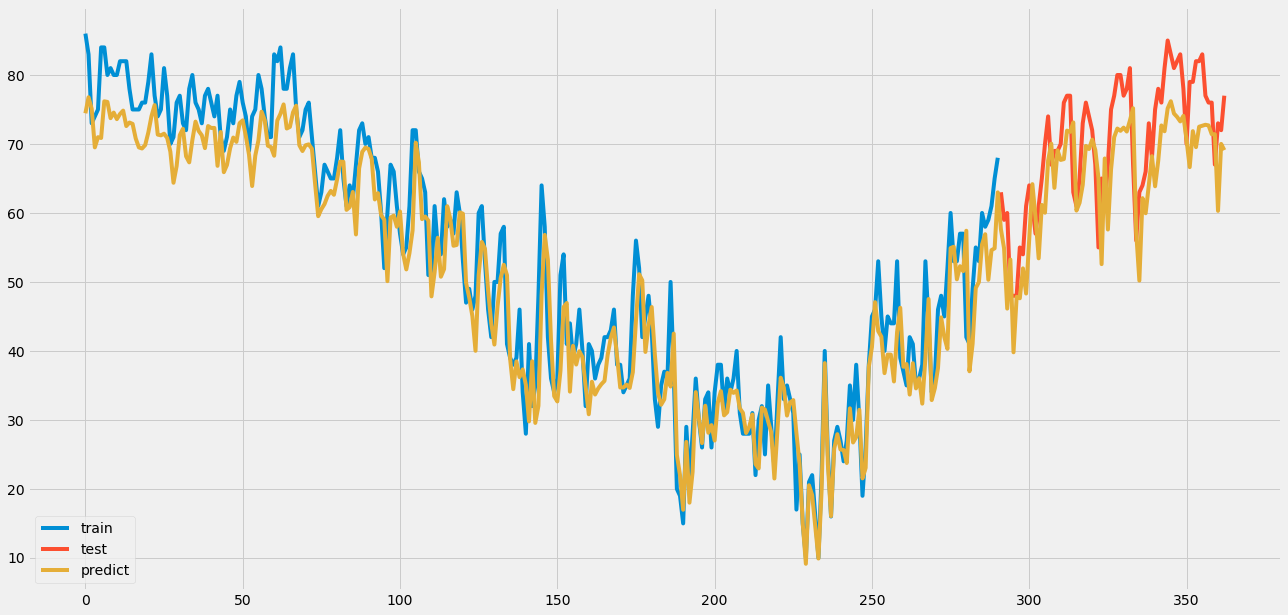

In [17]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMMultiple')